In [133]:
import numpy as np
import pandas as pd

In [134]:
df=pd.read_csv("/content/drive/MyDrive/COVIDSenti-A.csv")

In [135]:
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


**Preprocessing**

In [136]:
df.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [137]:
#checking duplicates
duplicate = df[df.duplicated()]
duplicate

,tweet,label
553,This coronavirus really be spreading huh,neu
11873,I have the coronavirus,neu
13795,Copper price and coronavirus: ‚ÄúBlack swan li...,neg
13796,Copper price and coronavirus: ‚ÄúBlack swan li...,neg
14016,The latest Best Shot News! https://t.co/Zc6iKi...,pos
18984,"U.K., Spain confirm new coronavirus virus case...",neu
20897,Corona Virus is the talk of the town.\nTo unde...,pos
21120,COVID-19,neu
21323,#news #health - Coronavirus cases climb to 174...,neu
21493,COVID-19,neu


In [138]:
#checking null values
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [140]:
import re

In [141]:
df["tweet"][4]

'China - Media: WSJ says sources tell them mystery pneumonia is a new coronavirus - something that has been speculat‚Ä¶ https://t.co/3pJMDuiazw'

In [142]:
df.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [143]:
def clean():
    text_clean= [ ]
    for d in df["tweet"]:
         text = re.sub(r'http\S+', ' ', d)
         text = re.sub(r'@\w+', '', text)
         text = text.lower()
         text = re.sub(r'^[A-Z][a-z][0-9]', '', text)
         text = re.sub(r'|', '', text)
         text= re.sub('[^a-zA-Z#]+',' ',text)
         
         text=text.replace('#','')
         text_clean.append(text)
         
    return text_clean

In [144]:
c=clean()

In [145]:
new_data = pd.DataFrame(c,columns=['tweet'])
new_data['label'] = df.label
new_data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that s true corona virus swine flue bird flu ...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [146]:
#dropping duplicate values
new_data.drop_duplicates(inplace=True)

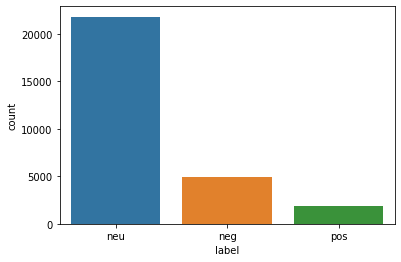

In [147]:
import seaborn as sns
sns.countplot(x=new_data["label"])

In [148]:
#splitting the dataframe 
x=new_data["tweet"]
y=new_data["label"]

In [149]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=48)

In [150]:
#vectorization using tf_idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
tr_vec = vectorizer.fit_transform(x_train)
tes_vec = vectorizer.transform(x_test)

In [151]:
#Fitting the model
from sklearn.svm import SVC  
classifier = SVC(kernel='linear') 
classifier.fit(tr_vec, y_train)

SVC(kernel='linear')

In [152]:
pred = classifier.predict(tes_vec)

In [153]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         neg       0.86      0.78      0.82       943
         neu       0.92      0.96      0.94      4353
         pos       0.84      0.61      0.71       415

    accuracy                           0.91      5711
   macro avg       0.87      0.78      0.82      5711
weighted avg       0.90      0.91      0.90      5711



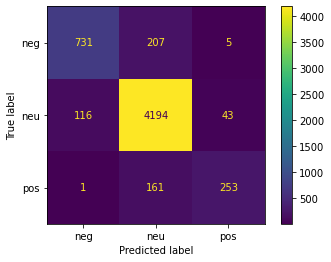

In [154]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [155]:
#accuracy score
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(pred,y_test)
print(acc_score)

0.9066713360182105
